# HEXAGON LIBRARY IN PYTHON

adapted from: https://www.redblobgames.com/grids/hexagons/#map-storage

In [529]:
import random
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import time
from collections import Counter

In [222]:
class Orientation:
    def __init__(self, forward_matrix, inv_matrix, start_angle_):
        
        if not isinstance(forward_matrix, np.ndarray):
            forward_matrix = np.array(forward_matrix)
        if not isinstance(inv_matrix, np.ndarray):
            inv_matrix = np.array(inv_matrix)
        self.forward_matrix = forward_matrix
        self.inv_matrix = inv_matrix
        self.start_angle = start_angle_
        

In [288]:
layout_pointy = Orientation([
    [np.sqrt(3.0), np.sqrt(3.0)/2.0], [0.0,3.0/2.0]
],
[
    [np.sqrt(3.0) / 3.0, -1.0 / 3.0], [0.0, 2.0 / 3.0]
],
0.5)


layout_flat = Orientation([
    [3.0 / 2.0, 0.0], [np.sqrt(3.0) / 2.0, np.sqrt(3.0)]],
    [
                [2.0 / 3.0, 0.0], [-1.0 / 3.0, np.sqrt(3.0) / 3.0]],
                0.0)

In [281]:
class Layout:
    def __init__(self, orientation, size: Point, origin: Point):
        if not isinstance(orientation, Orientation):
            raise ValueError("Orientation must be an instance of Orientation")
        
        if not isinstance(size, Point) or not isinstance(origin, Point):
            raise ValueError("Size and origin must be instances of Point")
        
        self.orientation = orientation
        self.size = size
        self.origin = origin

In [171]:
class FractionalHex:
    def __init__(self, q: float, r: float, s: float):
        self.q = q
        self.r = r
        self.s = s
        
    def __repr__(self):
        return f"FractionalHex(q={self.q}, r={self.r}, s={self.s})"
    
    def pixel_to_hex(self, layout, p: Point):
        if not isinstance(layout, Layout):
            raise ValueError("Must be Layout instance")
        pt = np.array([(p.x - layout.origin.x) / layout.size.x,
                   (p.y - layout.origin.y) / layout.size.y])
    
        q, r = layout.orientation.forward_matrix @ pt
    
        return FractionalHex(q, r, -q - r)
    

In [210]:
Point = namedtuple('Point', ['x', 'y'])

def hex_corner_offset(layout, corner: int):
    if not isinstance(layout, Layout):
        raise ValueError("Must be Layout instance")
    size = layout.size
    angle = 2.0 * np.pi * (layout.orientation.start_angle + corner) / 6

    return Point(size.x * np.cos(angle), size.y * np.sin(angle))     


def hex_to_pixel(layout, h):
    if not isinstance(layout, Layout):
        raise ValueError("Must be Layout instance")

    if not isinstance(h, Hex):
        raise ValueError("Must be Hex instance")

    M = layout.orientation.forward_matrix
    size = layout.size
    origin = layout.origin
    h_vector = np.array([h.q, h.r])
    xy = M @ h_vector 

    return Point(xy[0] * size.x + origin.x, xy[1] * size.y + origin.y)

In [211]:
def polygon_corners(layout, h):
    if not isinstance(layout, Layout):
        raise ValueError("Must be Layout instance")
            
    if not isinstance(h, Hex):
        raise ValueError("Must be Hex instance")
        
    corners = []
    center = hex_to_pixel(layout, h)
    
    for i in range(6):
        offset = hex_corner_offset(layout, i)
        corners.append(Point(center.x + offset.x, center.y + offset.y))   
    
    return corners

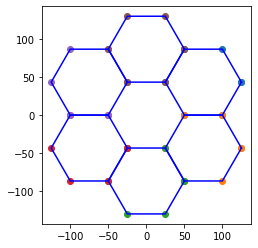

In [265]:
for hexagon in hexagons:
    x_coords = [point.x for point in hexagon]
    y_coords = [point.y for point in hexagon]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    

    plt.scatter(x_coords, y_coords)
    

    plt.plot(x_coords, y_coords, linestyle='-', color='blue')

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [480]:
class Hex:
    DIRECTIONS = [
        (1, 0, -1), (1, -1, 0), (0, -1, 1),
        (-1, 0, 1), (-1, 1, 0), (0, 1, -1)
    ]
    
    def __init__(self, q: int, r:int, resource: str = None, token: int = 0):
        self.q = q
        self.r = r
        self.s = - q - r
        self.resource = resource
        self.token = token
        
    def __eq__(self, other):
        if isinstance(other, Hex):
            return self.q == other.q and self.r == other.r and self.s == other.s
        
    def __ne__(self, other):
        return not self.__eq__(other)
    
    def __hash__(self):
        return hash((self.q, self.r, self.s))
    
    def __repr__(self):
        return f"Type: {self.resource}, Coord(q={self.q}, r={self.r}, s={self.s}), Token={self.token}" 
    
    @staticmethod
    def to_hex(direction):
        return Hex(direction[0], direction[1])
    
    def add(self, other):
        return Hex(self.q + other.q, self.r + other.r)
    
    def subtract(self, other):
        return Hex(self.q - other.q, self.r - other.r)
    
    def multiply(self, other):
        return Hex(self.q * other.q, self.r * other.r)
    
    def length(self):
        return int((abs(self.q) + abs(self.r) + abs(self.s)) / 2)
    
    def distance_from(self, other):
        diff = self.subtract(other)
        return diff.length() 
    
    def get_direction(self, direction: int): # 0 to 5
        assert (0 <= direction < 6), "em what the sigma"
        return self.to_hex(Hex.DIRECTIONS[direction])
    
    def get_neighbour(self, direction: int):
        return self.add(self.get_direction(direction))
    
    def set_token(self, token: int):
        self.token = token
        

In [485]:
"""
Gen map
"""
map = set()
N=3
resource

for q in range(-N,N):
    r1 = max(-N, -q - N)
    r2 = min(N, -q + N)
    
    for r in range(r1, r2+1):
        map.add(Hex(q,r))



Configuration is valid


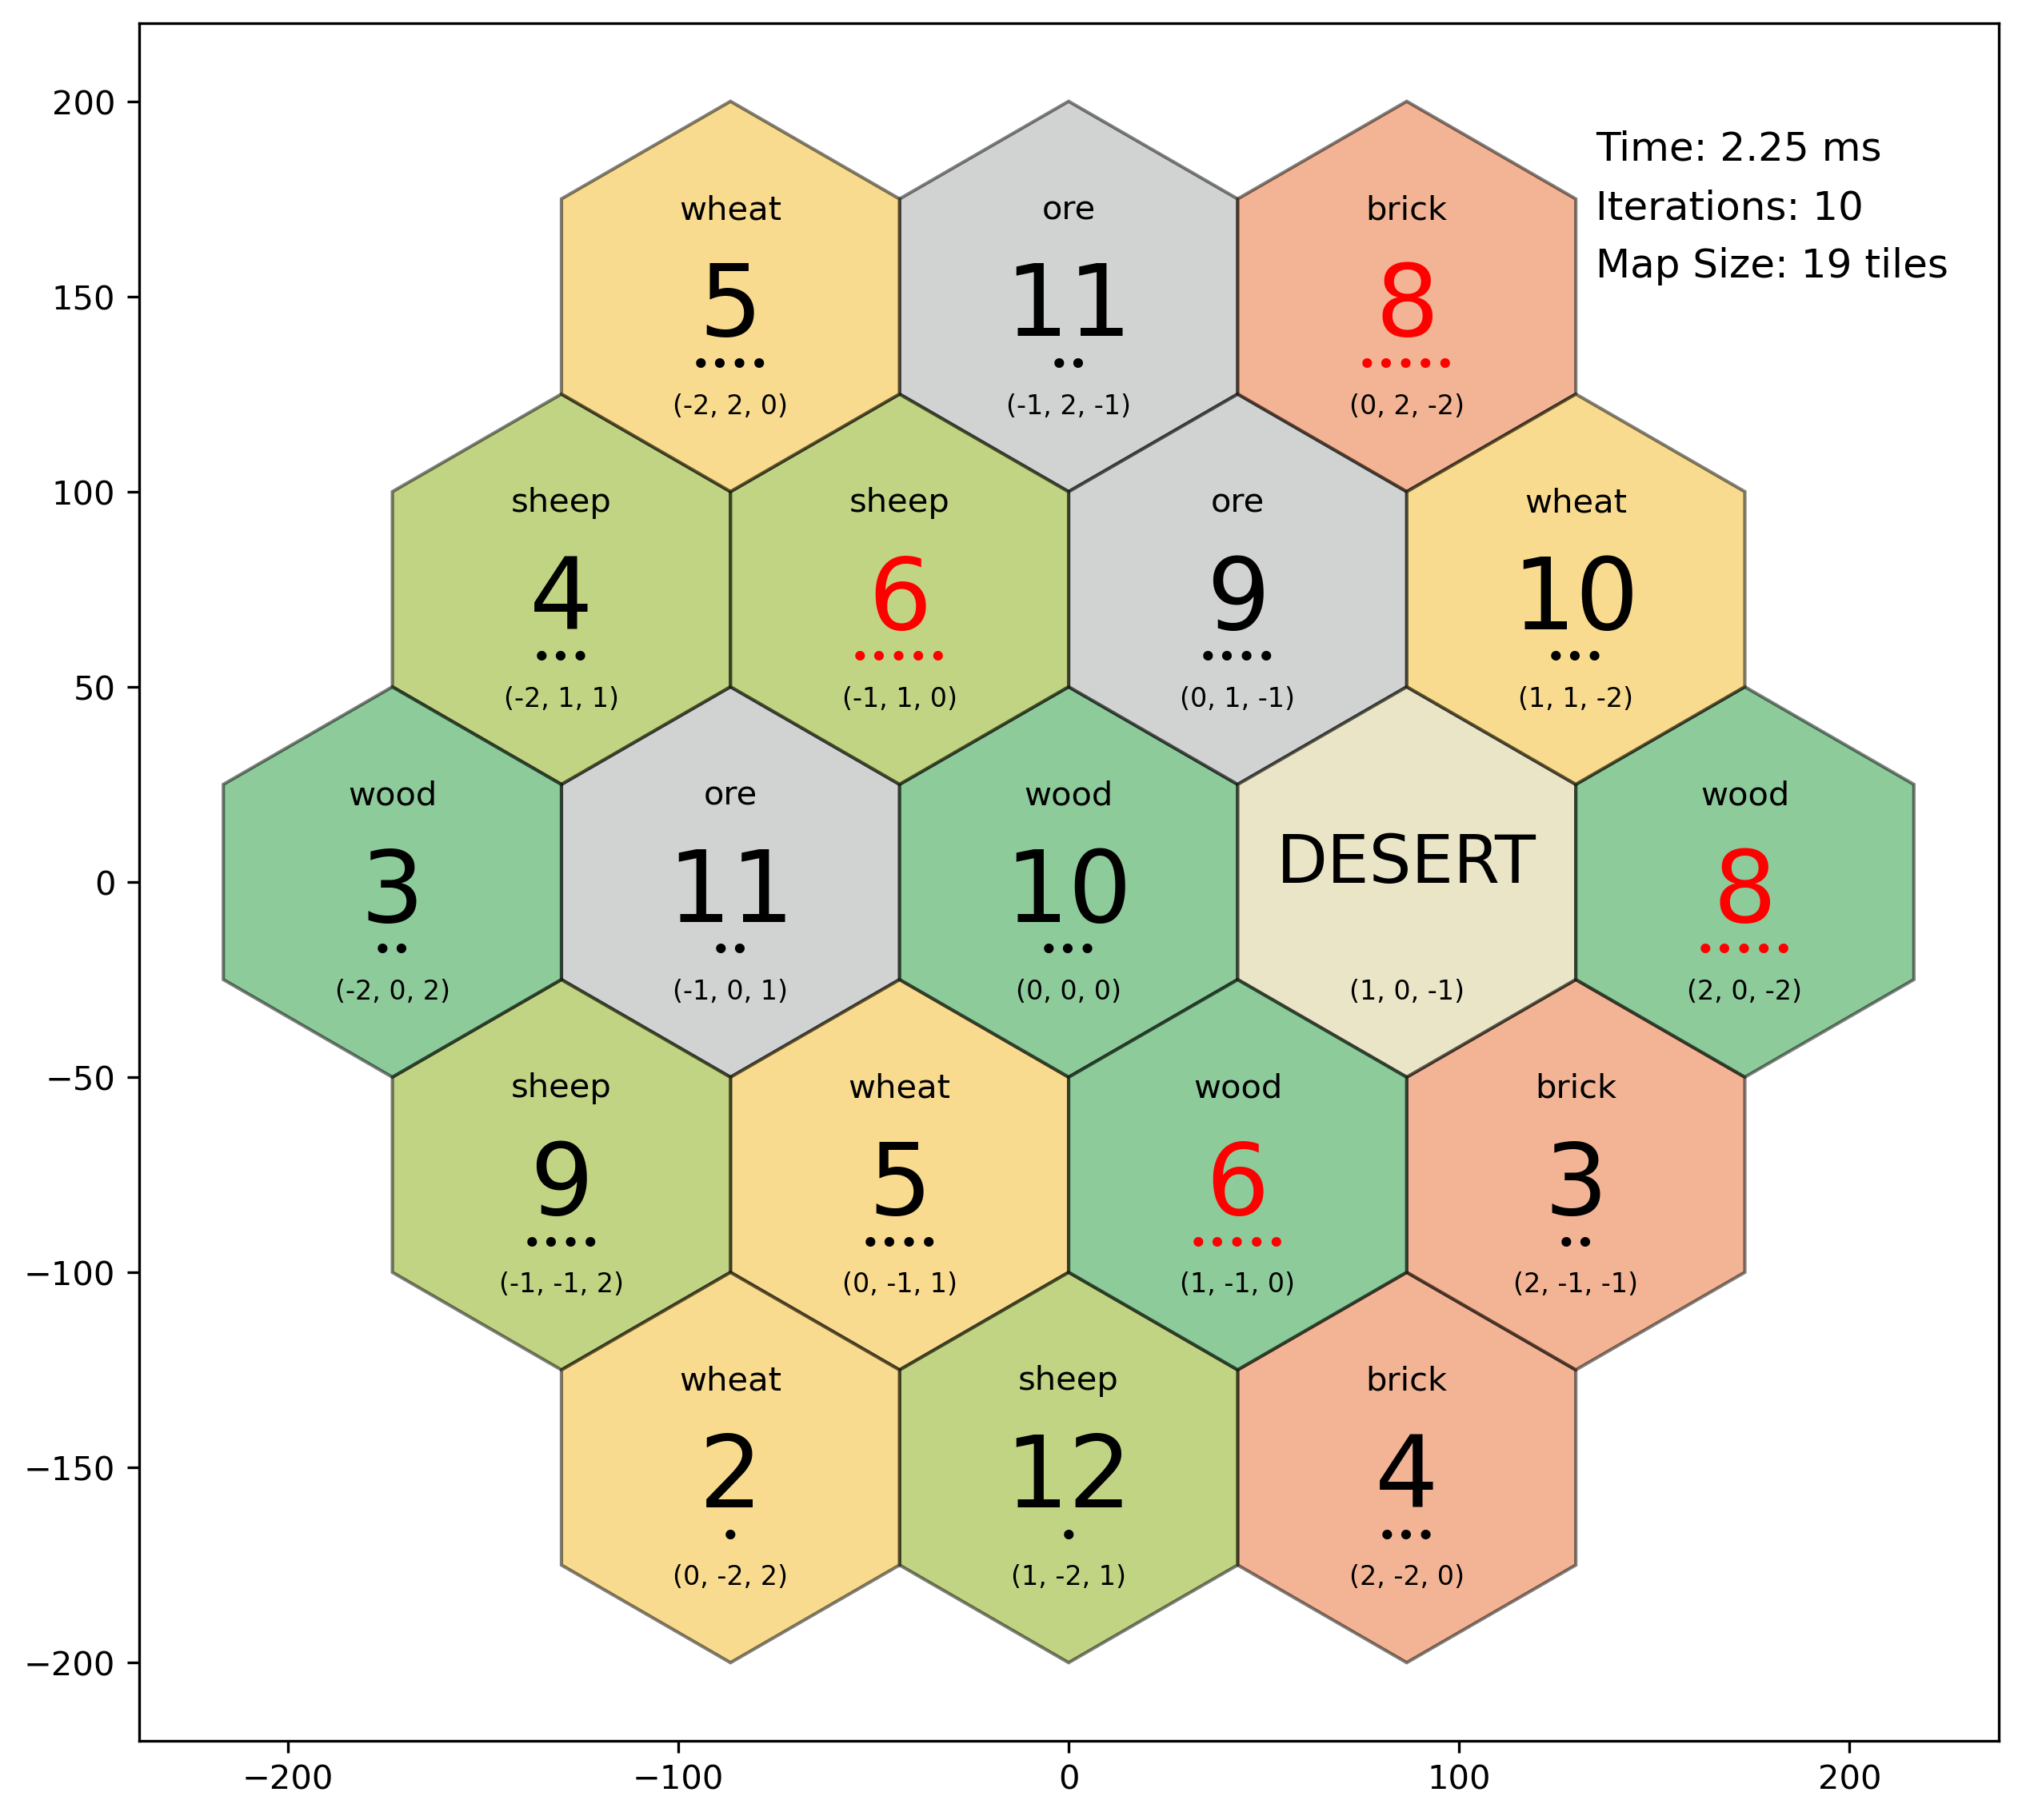

In [559]:
def validate_tiles(hex_map):
    # Convert map to a dictionary for faster lookups
    hex_dict = {(tile.q, tile.r): tile for tile in hex_map}
    
    for tile in hex_map:
        for i in range(6):
            neighbour = tile.get_neighbour(i)
            neighbor_tile = hex_dict.get((neighbour.q, neighbour.r))
            
            if neighbor_tile:
                if tile.token == neighbor_tile.token:
                    return False
                if (tile.token == 6 and neighbor_tile.token == 8) or (tile.token == 8 and neighbor_tile.token == 6):
                    return False
    
    print("Configuration is valid")
    return True

def start_validation(hex_map):
    legal = False
    iteration = 0
    start_time = time.time()
    
    while not legal:
        iteration += 1
        tokens = ['2'] + ['3'] * 2 + ['4'] * 2 + ['5'] * 2 + ['6'] * 2 + ['8'] * 2 + ['9'] * 2 + ['10'] * 2 + ['11'] * 2 + ['12']
        tokenised_map = hex_map.copy()
        
        for hex in tokenised_map:
            if hex.resource == 'desert':
                continue
            random.shuffle(tokens)
            token = tokens.pop()
            hex.set_token(int(token))

        legal = validate_tiles(tokenised_map)
    
    end_time = time.time()
    duration = end_time - start_time
    
    return tokenised_map, iteration, duration

def plot_hex_map(hex_map, iterations, duration):
    plt.figure(figsize=(10, 10))
    layout = Layout(layout_pointy, Point(50, 50), Point(0, 0))
    

    token_counts = Counter(hex.token for hex in hex_map if hex.resource != 'desert')
    resource_counts = Counter(hex.resource for hex in hex_map)
    map_size = len(hex_map)

    for hex in hex_map:
        corners = polygon_corners(layout, hex)
        xs = [corner.x for corner in corners]
        ys = [corner.y for corner in corners]
        plt.fill(xs, ys, get_tile_colour(hex.resource), edgecolor='black', alpha=0.5)

        center_x = sum(xs) / len(xs)
        center_y = sum(ys) / len(ys)

        if hex.resource == 'desert':
            plt.text(center_x, center_y, "DESERT", ha='center', fontsize=20)
            plt.text(center_x, center_y - 30, f"({hex.q}, {hex.r}, {hex.s})", ha='center', fontsize=8)
        else:
            scarcity = scarcity_map.get(hex.token, 1)
            dots = "•" * scarcity
            color = 'red' if scarcity == 5 else 'black'

            plt.text(center_x, center_y + 20, hex.resource, ha='center', fontsize=10)
            plt.text(center_x, center_y - 10, hex.token, color=color, ha='center', fontsize=30)
            plt.text(center_x, center_y - 20, dots, color=color, ha='center', fontsize=10)
            plt.text(center_x, center_y - 30, f"({hex.q}, {hex.r}, {hex.s})", ha='center', fontsize=8)
    

    plt.text(2.7 * 50, 3.7 * 50, f"Time: {duration*1000:.2f} ms", fontsize=12)
    plt.text(2.7 * 50, 3.4 * 50, f"Iterations: {iterations}", fontsize=12)
    plt.text(2.7 * 50, 3.1 * 50, f"Map Size: {map_size} tiles", fontsize=12)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


N = 2  
hex_map = set()
resources = ['wood'] * 4 + ['sheep'] * 4 + ['wheat'] * 4 + ['brick'] * 3 + ['ore'] * 3 + ['desert']


for q in range(-N, N + 1):
    r1 = max(-N, -q - N)
    r2 = min(N, -q + N)
    random.shuffle(resources)
    for r in range(r1, r2 + 1):
        resource = resources.pop()
        hex_map.add(Hex(q, r, resource))


hex_map, iterations, duration = start_validation(hex_map)
plot_hex_map(hex_map, iterations, duration)

In [420]:
def get_tile_colour(resource) -> str:
    colors = {
    'brick': "#e66a2b",
    'wheat': "#f3b920",
    'wood': "#1c9938",
    'desert': "#d5cc8f",
    'sheep': "#85ab0a",
    "ore": "#a3a9a5"
        
    }
    
    return colors.get(resource, "#fff")

def search_hex(hex_set, q, r):
    for hex_tile in hex_set:
        if hex_tile.q == q and hex_tile.r == r:
            return True
    return False 

In [493]:
scarcity_map = {
    2: 1, 3: 2, 4: 3, 5: 4, 6: 5,
    8: 5, 9: 4, 10: 3, 11: 2, 12: 1
}
scarcity_map.get(11)

2

In [345]:
resources = ['wood'] * 4 + ['sheep'] * 4 + ['wheat'] * 4 + ['brick'] * 3 + ['ore'] * 3 + ['desert']
random.shuffle(resources)
resources.pop()

'sheep'

In [411]:
numbers = ['2'] + ['3'] * 2 + ['4'] * 2 + ['5'] * 2 + ['6'] * 2 + ['8'] * 2 + ['9'] * 2 + ['10'] * 2 + ['11'] * 2 + ['12']


18